In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
alto = 50
ancho = 200
array = np.zeros((alto,ancho))
mi_arreglo=np.zeros((alto,ancho))

print('las dimensiones del arreglo son', mi_arreglo)

las dimensiones del arreglo son [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


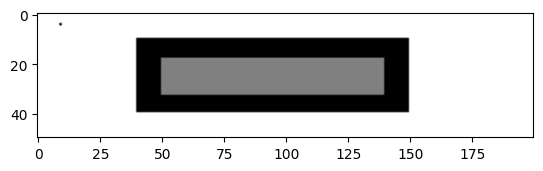

In [4]:
%matplotlib inline
array[4,9]=1
array[10:40,40:150]=1
#array[18:33,50:140]=0.5
plt.imshow(-array, cmap='gray')

# **LECTURA IMAGEN**

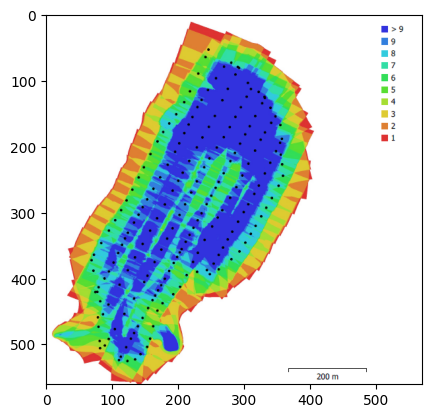

In [5]:
arch='imagen.png'
img_tmp=plt.imread(arch)
plt.imshow(img_tmp)

In [6]:
type(img_tmp)

numpy.ndarray

In [7]:
img_tmp.shape

(561, 571, 4)

In [8]:
img_tmp[250,250]

array([0.19215687, 0.8627451 , 0.41568628, 1.        ], dtype=float32)

In [9]:
img_tmp.max(),img_tmp.min()

(1.0, 0.0)

(561, 571)


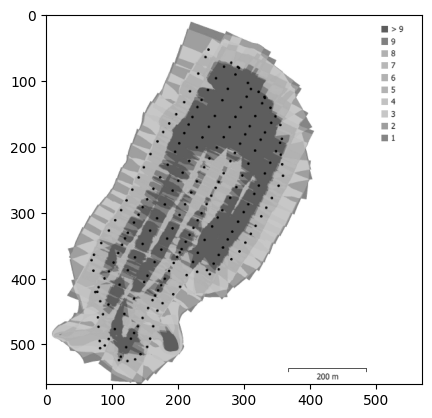

In [10]:
arch='imagen.png'
img_tmp2=cv2.imread(arch,0)
print(img_tmp2.shape)
plt.imshow(img_tmp2, cmap='gray')

In [11]:
import keras

In [12]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten

In [13]:
img=img_tmp2
h,w=img.shape
img.shape

(561, 571)

In [14]:
input_img=Input(shape=(h,w,1))
type(input_img)

keras.src.backend.common.keras_tensor.KerasTensor

In [15]:
x=Conv2D(1,(1,1), activation='relu', padding='same')(input_img)

In [16]:
img_resized=np.reshape(img_tmp2,(1,561, 571,1))
img_resized.shape

(1, 561, 571, 1)

In [17]:
from keras.models import Model
modelo1=Model(input_img,x)

In [18]:
modelo1.set_weights([np.array([[[[100.0]]]], dtype=np.float32), np.array([-50.0], dtype=np.float32)])

In [19]:
img1=modelo1.predict(img_resized)
img1.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


(1, 561, 571, 1)

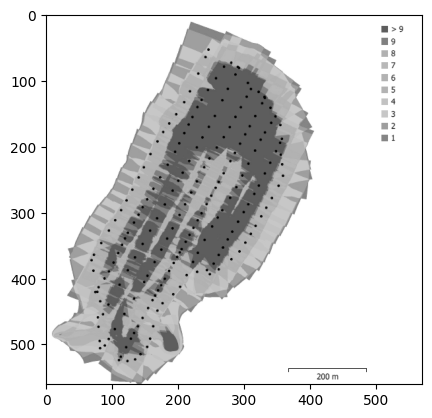

In [20]:
img_final=np.reshape(img1,(561,571))
plt.imshow(img_final, cmap='gray')

# **MAX POOLING**

In [21]:
img_resized=np.reshape(img_tmp2,(1,561, 571,1))
img_resized.shape

(1, 561, 571, 1)

In [22]:
x=Conv2D(1,(1,1), activation='relu', padding='same')(input_img)
x=MaxPooling2D((2,2), padding='same')(x)
modelo2=Model(input_img,x)
modelo2.set_weights([np.array([[[[100.0]]]], dtype=np.float32), np.array([-50.0], dtype=np.float32)])
img2=modelo2.predict(img_resized)
img2.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


(1, 281, 286, 1)

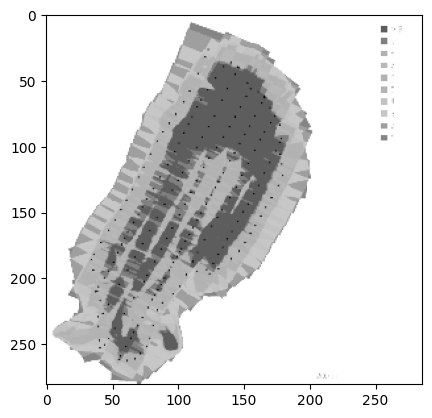

In [23]:
img_final2=np.reshape(img2,(281,286))
plt.imshow(img_final2, cmap='gray')

# **REFORMAR FILTROS**

In [24]:
from IPython.display import Image
import numpy as np
import time
import os
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model
import glob
import cv2
import json
from matplotlib import pyplot as plt
import keras



# rutina que imprime imágenes y algunas de sus características
# las imágenes son en escala de grises, flotante
def ver_imgs_gris(noms):
  global imgs
  n=len(noms)
  plt.clf()
  plt.figure(figsize=(6, n*5))
  #plt.figure()#figsize=(20, 4))
  for i in range(n):
      img=imgs[noms[i]]
      print(noms[i],img.shape,'min:',img.min(),'max:',img.max(),'esquina:',img[0,0,0,0])
      #h,w=imgs[i].shape
      ax = plt.subplot(n, 1, i+1)
      plt.imshow(-img[0,:,:,0])
#      plt.imshow(imgs[i].reshape(h, w))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      ax.set_title(noms[i])
  return plt.show()

def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida

# **FILTROS MANUALES 2x2**

In [25]:
alto = 50
ancho = 200
array = np.zeros((alto,ancho))
array[10:40,40:150]=1

img=array
h,w=img.shape

input_img2=Input(shape=(h,w,1))

X = Conv2D(2,(2,2), activation='linear', padding='same')(input_img2)
modelo3=Model(input_img2,X)

filtro1=[[1,-1],
          [1,-1]]
filtro2=[[1,1],
          [-1,-1]]

filtros=reformar_filtros([filtro1,filtro2])

modelo3.set_weights([filtros,np.array([0,0], dtype=np.float32)])

arreglo 2 2 2 (2, 2, 1, 2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


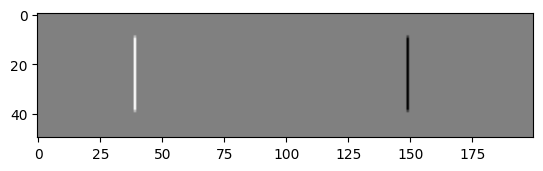

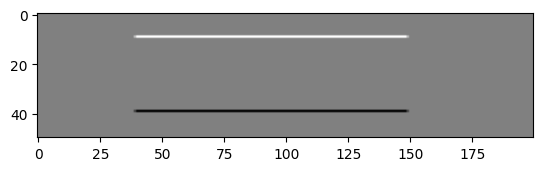

In [26]:
reshape=np.reshape(array,(1,50,200,1))

img_tmp4=modelo3.predict(reshape)

imgf1=np.reshape(img_tmp4[0,:,:,0],(50,200))
imgf2=np.reshape(img_tmp4[0,:,:,1],(50,200))

plt.imshow(-imgf1, cmap='gray')
plt.show()
plt.imshow(-imgf2, cmap='gray')
plt.show()

# **FILTROS MANUALES 3X3**

In [27]:
alto = 50
ancho = 200
array = np.zeros((alto,ancho))
array[10:40,40:150]=1

img=array
h,w=img.shape

input_img3=Input(shape=(h,w,1))

X = Conv2D(3,(3,3), activation='linear', padding='same')(input_img3)
modelo4=Model(input_img3,X)

filtro3=[[1,0,-1],
          [1,0,-1],
           [1,0,-1]]
filtro4=[[1,1,1],
          [0,0,0],
           [-1,-1,-1]]
filtro5=[[1,2,1],
          [2,-12,2],
           [1,2,1]]

filtros=reformar_filtros([filtro3,filtro4,filtro5])

modelo4.set_weights([filtros,np.array([0,0,0], dtype=np.float32)])

arreglo 3 3 3 (3, 3, 1, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


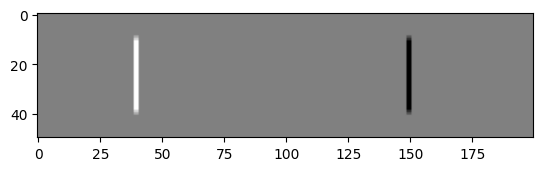

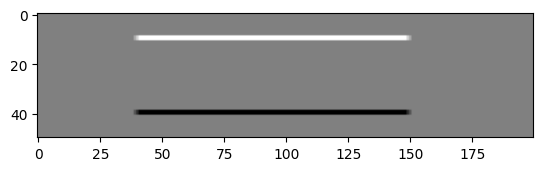

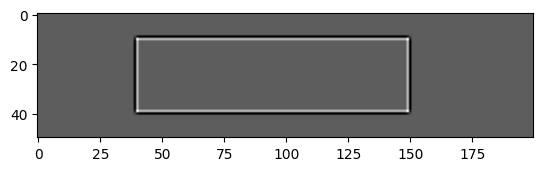

In [30]:
reshape=np.reshape(array,(1,50,200,1))

img_tmp5=modelo4.predict(reshape)

imgf3=np.reshape(img_tmp5[0,:,:,0],(50,200))
imgf4=np.reshape(img_tmp5[0,:,:,1],(50,200))
imgf5=np.reshape(img_tmp5[0,:,:,2],(50,200))

plt.imshow(-imgf3, cmap='gray')
plt.show()
plt.imshow(-imgf4, cmap='gray')
plt.show()
plt.imshow(-imgf5, cmap='gray')
plt.show()